# 14. Iris의 세 가지 품종, 분류해 볼까요?

## (1) 붓꽃 분류 문제 : 붓꽃의 종류가 setosa, versicolor, virginica 세 가지 중 무엇인지 맞추기

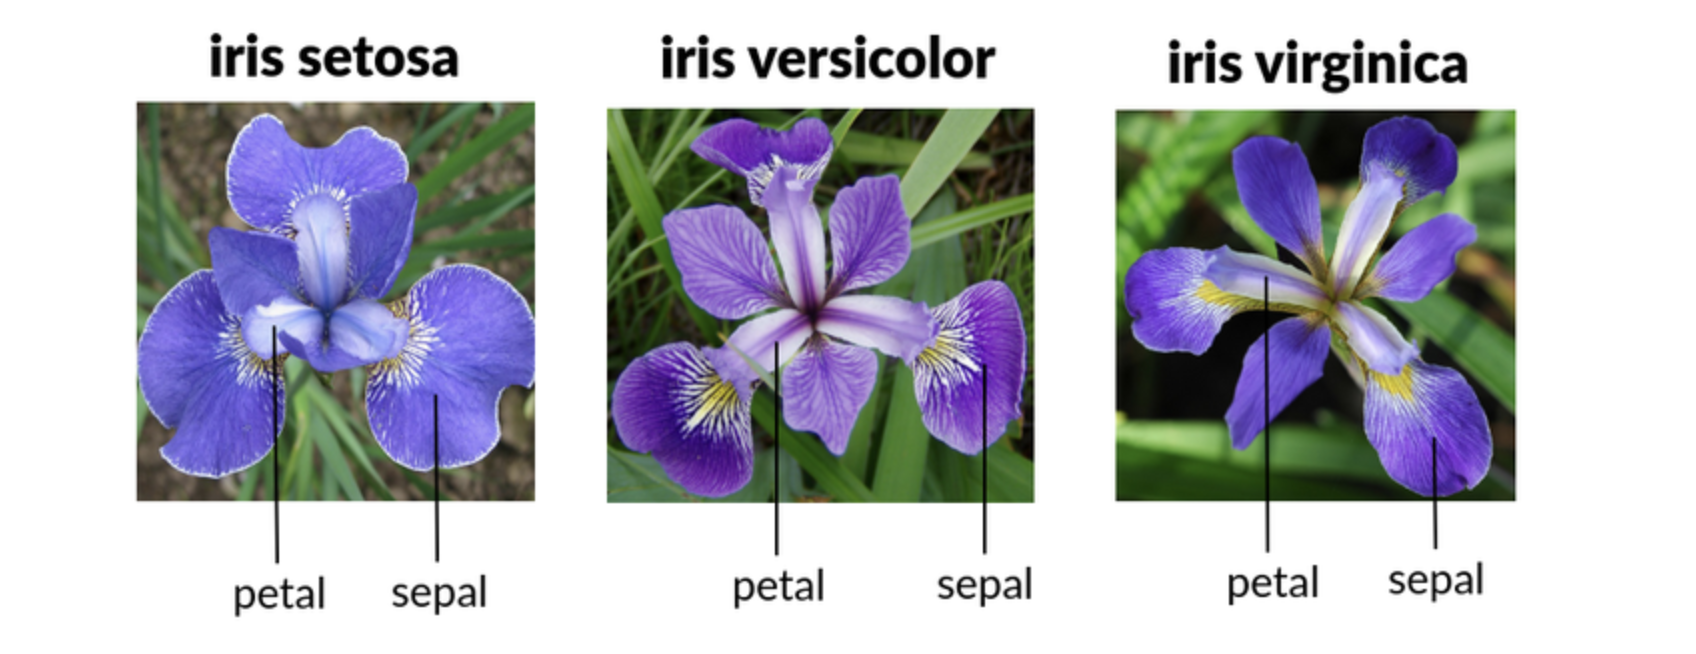
**petal:꽃잎 / sepal:꽃받침 (그림이 잘못된 듯)

사진에서 볼 수 있듯 setosa, versicolor, virginica 세 가지의 붓꽃은 모두 꽃잎과 꽃받침의 크기가 조금씩 다릅니다. 꽃잎과 꽃받침의 크기뿐만 아니라 색깔도 조금씩 다르죠. 

머신러닝 기법을 활용한다면 붓꽃을 잘 분류해낼 수 있을까요? 어디 한번, 얼마나 잘 분류해내는지 바로 확인해 보겠습니다. 시작해 보시죠!

## 데이터 가져오기 및 살펴보기

###  사이킷런(scikit-learn) 에 내장된 데이터: Iris plants dataset
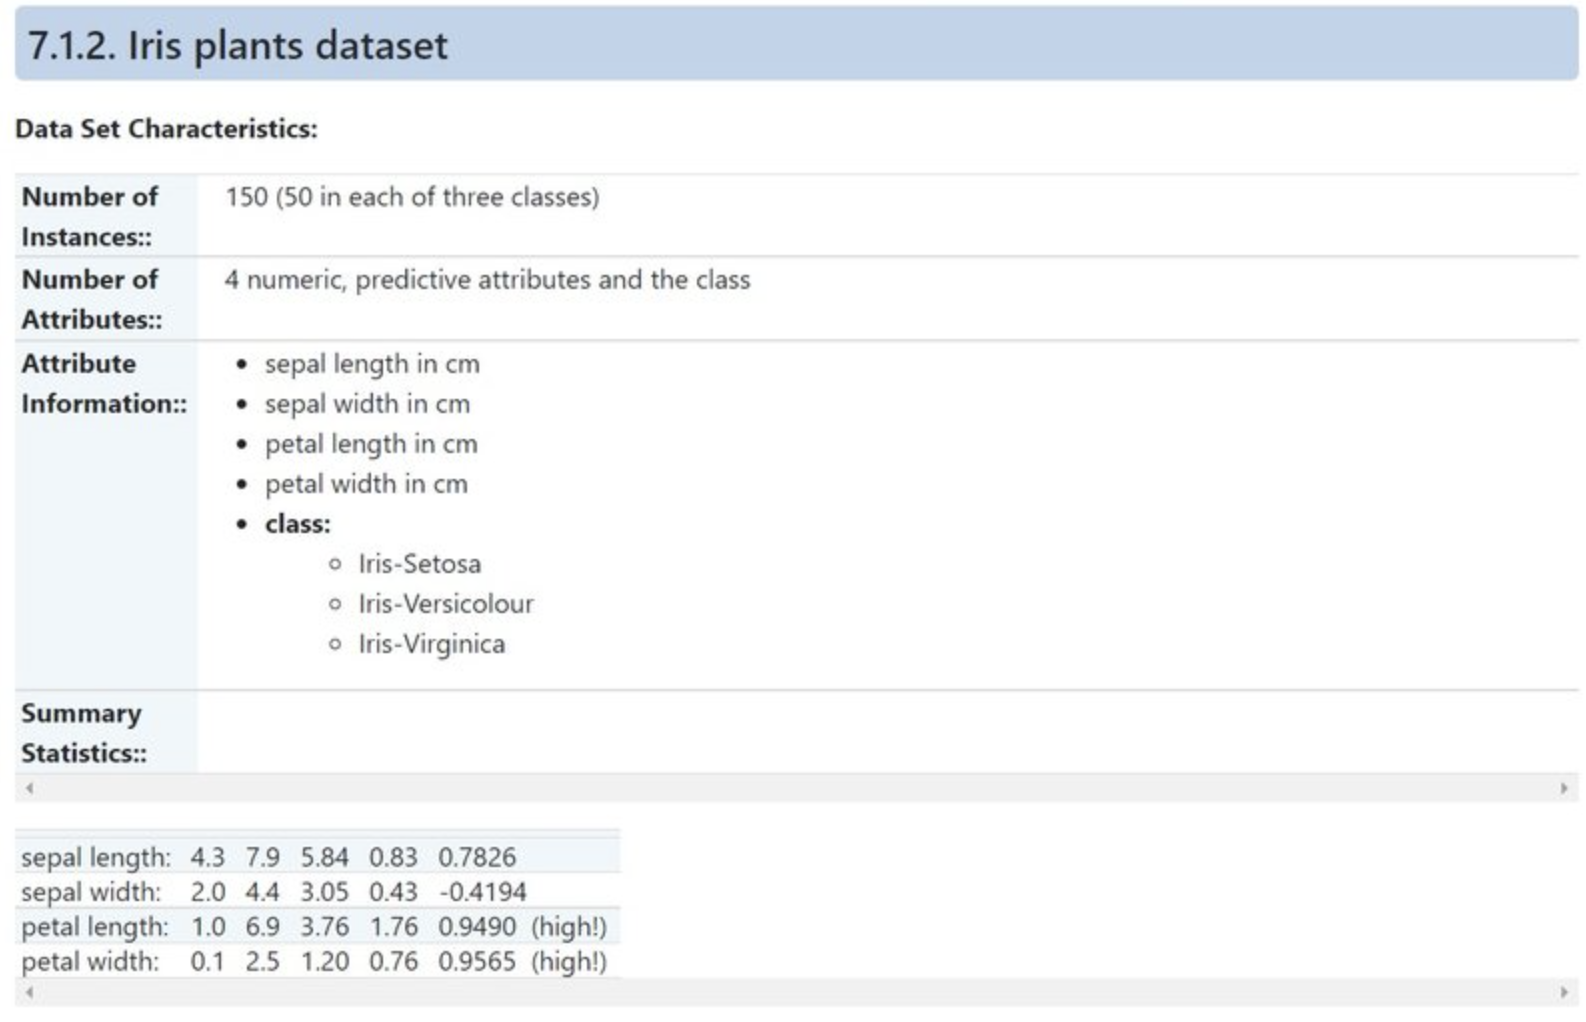

총 150개 데이터

정보 : 1. sepal 길이
        2. sepal 폭
        3. petal 길이
        4. petal 폭
        
종류 : setosa, versicolour, virginica

#### load_iris를 import 해와서 iris 데이터를 로딩

In [68]:
from sklearn.datasets import load_iris
# sklearn 라이브러리의 datasets 패키지에서 load_iris 함수를 임포트함

iris = load_iris()
# load_iris 함수는 iris 데이터셋을 로드하는 함수
# 로드된 iris 데이터셋을 iris라는 변수에 저장

print(dir(iris))
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


#### iris에는 어떤 정보들이 담겼을지, keys() 라는 메서드로 확인

In [69]:
iris.keys()
# iris 데이터셋에 담긴 정보 종류 확인

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

#### 데이터는 iris_data 변수에 저장한 후, 데이터의 크기를 확인

In [70]:
iris_data = iris.data
# keys에서 확인한 정보 중 data를 따로 iris_data 변수에 저장

print(iris_data.shape) 
# shape는 배열의 형상정보를 출력

(150, 4)


### 분석 : 
150개의 데이터가 각각 4개의 정보를 담고 있음

#### 샘플로 하나의 데이터만 확인

In [71]:
iris_data[0]
# 150개의 데이터 중 첫 번째 데이터 출력

array([5.1, 3.5, 1.4, 0.2])

### 분석:
순서대로 sepal length, sepal width, petal length, petal width를 나타냄

#### 라벨(label) 또는 타겟(target) 확인 및 저장

In [72]:
iris_label = iris.target
# keys에서 확인한 정보 중 target을 따로 iris_label 변수에 저장

print(iris_label.shape)
iris_label
# iris_data와 다르게 150개의 숫자만 가지고 있음

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 분석:
길이와 형태를 확인하니 총 150개의 데이터가 들어있고, 각 값은 0, 1, 또는 2로 나타나는 것을 확인 가능

#### 라벨의 이름을 target_names에서 확인

In [73]:
iris.target_names
# keys에서 확인한 정보 중 target_names를 변수에 따로 저장하지 않고 호출
# iris_label이 가진 0,1,2의 이름 확인

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 분석:
setosa, versicolor, virginica 순서대로 담겨있음

이 순서 그대로 0이라면 setosa, 1이라면 versicolor, 2라면 virginica를 나타냄

#### DESCR 데이터셋 설명서 출력

In [74]:
print(iris.DESCR)
# keys에서 확인한 정보 중 DESCR을 변수에 따로 저장하지 않고 호출
# 데이터셋 설명서 출력

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#### feature_names: 4개의 각 feature에 대한 설명

In [75]:
iris.feature_names
# keys에서 확인한 정보 중 feature_names를 변수에 따로 저장하지 않고 호출
# iris.data에서 확인한 4개 정보의 변수명 확인

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### filename:데이터셋의 전체 이름

In [76]:
iris.filename
# keys에서 확인한 정보 중 filename을 변수에 따로 저장하지 않고 호출
# 데이터셋의 이름 출력

'iris.csv'

### 분석:
iris데이터셋은 csv 형태의 파일로 되어있음

## (1) 머신러닝 모델을 학습시키기 위한 문제지와 정답지 준비

#### import pandas: iris 데이터는 행과 열이 있는 2차원 데이터이므로 pandas를 활용

In [77]:
import pandas as pd
# pandas 라이브러리를 pd라는 약칭으로 임포트

print(pd.__version__)
# pandas의 버전 확인

1.3.3


#### 붓꽃 데이터셋을 pandas가 제공하는 DataFrame 이라는 자료형으로 변환

DataFrame 을 만들면서 data에는 iris_data를 넣어주고, 각 컬럼에는 feature_names로 이름을 붙여주기

In [78]:
type(iris_data)
# iris_data의 데이터 타입은 numpy의 ndarray인 것을 확인할 수 있음

numpy.ndarray

In [79]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
# 150개 데이터가 각각 4개의 정보를 가지고 있던 iris_data를 
# iris.feature_names을 컬럼명으로 하는 DataFrame 자료형으로 변환해서 iris_df 변수에 저장
# (원래 iris_data는 배열(np.array) 자료형이었음!)
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

#### label(정답) 컬럼을 추가

In [80]:
iris_df["label"] = iris.target
# iris_df에 label이라는 컬럼을 새로 추가
# 150개의 숫자로 이루어져 있었던 iris.target를 label 컬럼에 채워넣기
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     label  
0        0  
1        0  
2        0  
3        0  
4        0  
..     ...  
145      2  
146      2  
147      2  
148      2  
149      2  

[150 rows x 5 columns]

### 분석:
여기서 4가지의 feature 데이터들은 바로 머신러닝 모델이 풀어야 하는 문제지와 같습니다.

예를 들어, [5.1, 3.5, 1.4, 0.2]라는 문제가 주어진다면 모델은 0, 즉 setosa라는 답을 맞혀야 하는 것이죠.

따라서 0, 1, 2와 같이 표현된 label 데이터는 머신러닝 모델에게 정답지라고 할 수 있습니다.

정리하자면 다음과 같습니다.

    문제지 : 머신러닝 모델에게 입력되는 데이터. feature라고 부르기도 한다. 변수 이름으로는 X를 많이 사용한다.

    정답지 : 머신러닝 모델이 맞혀야 하는 데이터. label 또는 target이라고 부르기도 한다. 변수 이름으로는 y를 많이 사용한다.

#### 학습에 사용하는 training dataset과 모델의 성능을 평가하는 데 사용하는 test dataset으로 데이터셋을 나누기

In [81]:
from sklearn.model_selection import train_test_split
# sklearn model_selection패키지의 train_test_split 함수를 임포트

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)
# 나눠야 할 데이터(문제지, X): iris_data
# 데이터의 라벨(정답, y): iris_label
# iris_data와 iris_label를 각각 train:test = 8:2의 비율로 잘라서 
# X_train, X_test, y_train, y_test에 저장


print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
# len은 배열의 길이를 출력

X_train 개수:  120 , X_test 개수:  30


In [82]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape
# train의 형상정보 확인 # test의 형상정보 확인

((120, 4), (120,), (30, 4), (30,))

## (2) 첫 번째 머신러닝 모델 학습시키기

붓꽃 문제는

    첫 번째, 머신러닝 중 정답이 있고 그 정답을 맞히기 위해 학습하는 지도 학습(Supervised Learning) 이며,

    지도학습 중에서는 특정 카테고리 중 주어진 데이터가 어떤 카테고리에 해당하는지를 맞히는 분류(Classification) 문제입니다.

#### Decision Tree를 import하고, decision_tree 라는 변수에 모델을 저장

In [83]:
from sklearn.tree import DecisionTreeClassifier 
# sklearn.tree 패키지에서 의사결정트리 모델 import

decision_tree = DecisionTreeClassifier(random_state=32) 
# random_state : 재현가능하도록 난수의 초기값 32로 설정
print(decision_tree._estimator_type)

classifier


#### 모델 학습하기

In [84]:
# 학습데이터 X_train, y_train로 의사결정나무 모델로 학습하기
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

## (3) 첫 번째 머신러닝 모델 평가하기

#### test 데이터로 예측

In [85]:
# 테스트데이터 X_test로 예측하기
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2])

#### 정확도(Accuracy) 확인

In [86]:
# 실제 정답 y_test과 예측값 y_pred 비교하여 정확도 측정하기
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9

## (4) 다른 모델에도 적용해보기

## DecisionTree 

In [87]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris #싸이킷런 데이터셋에 있는 iris를 불러오는 코드
from sklearn.model_selection import train_test_split #싸이킷런에 있는 데이터를 train과 test dataset으로 나누어주는 함수 import
from sklearn.tree import DecisionTreeClassifier # 싸이킷런에 있는 결정트리분류기를 사용하기 위해 불러오는 코드
from sklearn.metrics import classification_report #싸이킷런에 있는 분류 결과에 대한 시각화를 위해 쓰는 코드

# (2) 데이터 준비
iris = load_iris() #iris 데이터 전체를 불러온다.
iris_data = iris.data #iris데이터의 data컬럼을 분류해 iris_data 변수에 담는다.
iris_label = iris.target #iris데이터의 target컬럼을 분류해 iris_label 변수에 담는다.

# (3) train, test 데이터 분리
#train_test_split()를 사용하여 X값, y값을 각각 train data와 test data로 나눈다. 함수에 들어 갈 파라미터로는 x,y가 들어가고
#test_size는 몇대몇으로 나눌지 정하는 옵션, random_state는 랜덤 패턴의 값을 지정한다. (어떤 값을 넣어도 무방하다.)
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7) 


# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32) #결정트리분류기의 객체를 만든다.
decision_tree.fit(X_train, y_train) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred = decision_tree.predict(X_test) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.

decision_report = classification_report(y_test, y_pred) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred 값을 넣어 확인한다.
print(decision_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



## RandomForest
Random Forest가 완성되는 과정입니다.

1. 건강의 위험도를 예측하기 위해서는 많은 요소를 고려 성별, 키, 몸무게, 지역, 운동량, 흡연유무, 음주 여부, 혈당, 근육량, 기초 대사량 등 수많은 요소가 필요


2. Feature가 30개라 했을 때 30개의 Feature를 기반으로 하나의 결정 트리를 만든다면 트리의 가지가 많아질 것이고, 이는 오버피팅의 결과를 야기


3. 30개의 Feature 중 랜덤으로 5개의 Feature만 선택해서 하나의 결정 트리 생성


4. 계속 반복하여 여러 개의 결정 트리 생성


5. 여러 결정 트리들이 내린 예측 값들 중 가장 많이 나온 값을 최종 예측값으로 지정

    이렇게 의견을 통합하거나 여러 가지 결과를 합치는 방식을 앙상블(Ensemble)이라고 함
    
    하나의 거대한 (깊이가 깊은) 결정 트리를 만드는 것이 아니라 여러 개의 작은 결정 트리를 만드는 것
    
    분류 : 여러 개의 작은 결정 트리가 예측한 값들 중 가장 많은 값 / 회귀 : 평균
    
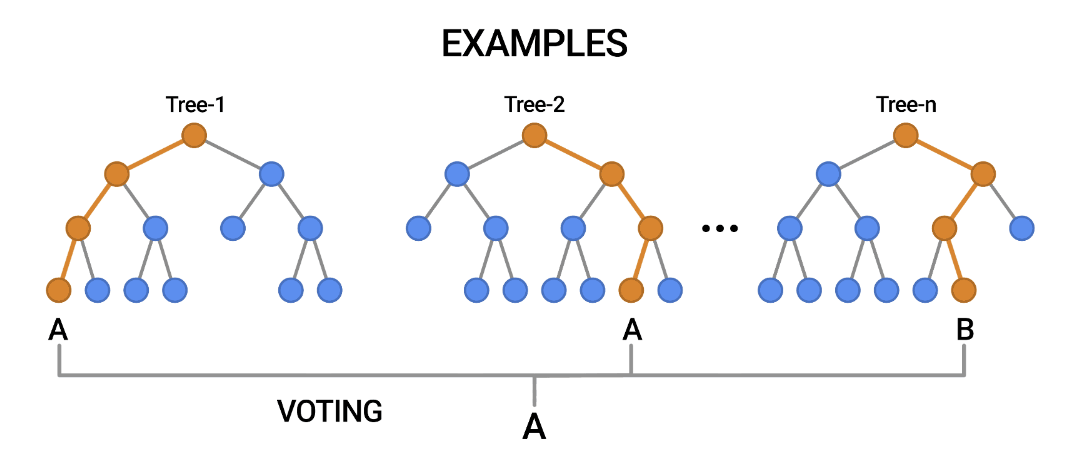


In [88]:
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트라는 분류기를 사용하기 위해 import

X_train, X_test, y_train, y_test = train_test_split(iris_data, # iris 데이터의 data 컬럼
                                                    iris_label, # iris 데이터의 target 컬럼
                                                    test_size=0.2, # test_size : train data와 test data를 몇대몇으로 나눌지 정하는 옵션
                                                    random_state=21) # random_state : 랜덤 패턴의 값을 지정

random_forest = RandomForestClassifier(random_state=32) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측


random_report = classification_report(y_test, y_pred)
print(random_report) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



## Support Vector Machine (SVM)

SVM은 Support Vector와 Hyperplane(초평면)을 이용해서 분류를 수행하게 되는 대표적인 선형 분류 알고리즘

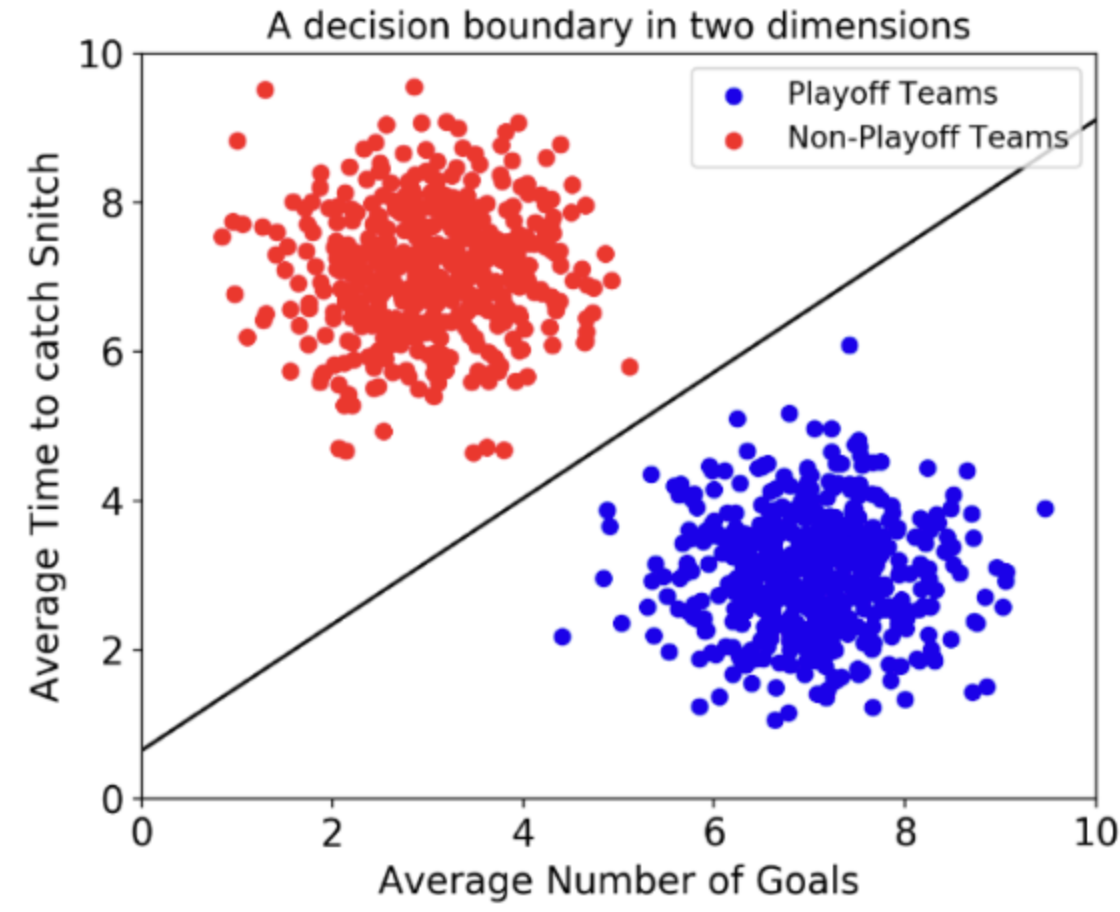

2 차원 공간에서, 즉 데이터에 2개의 클래스만 존재할 때,

* Decision Boundary(결정 경계): 두 개의 클래스를 구분해 주는 선


* Support Vector: Decision Boundary에 가까이 있는 데이터


* Margin: Decision Boundary와 Support Vector 사이의 거리

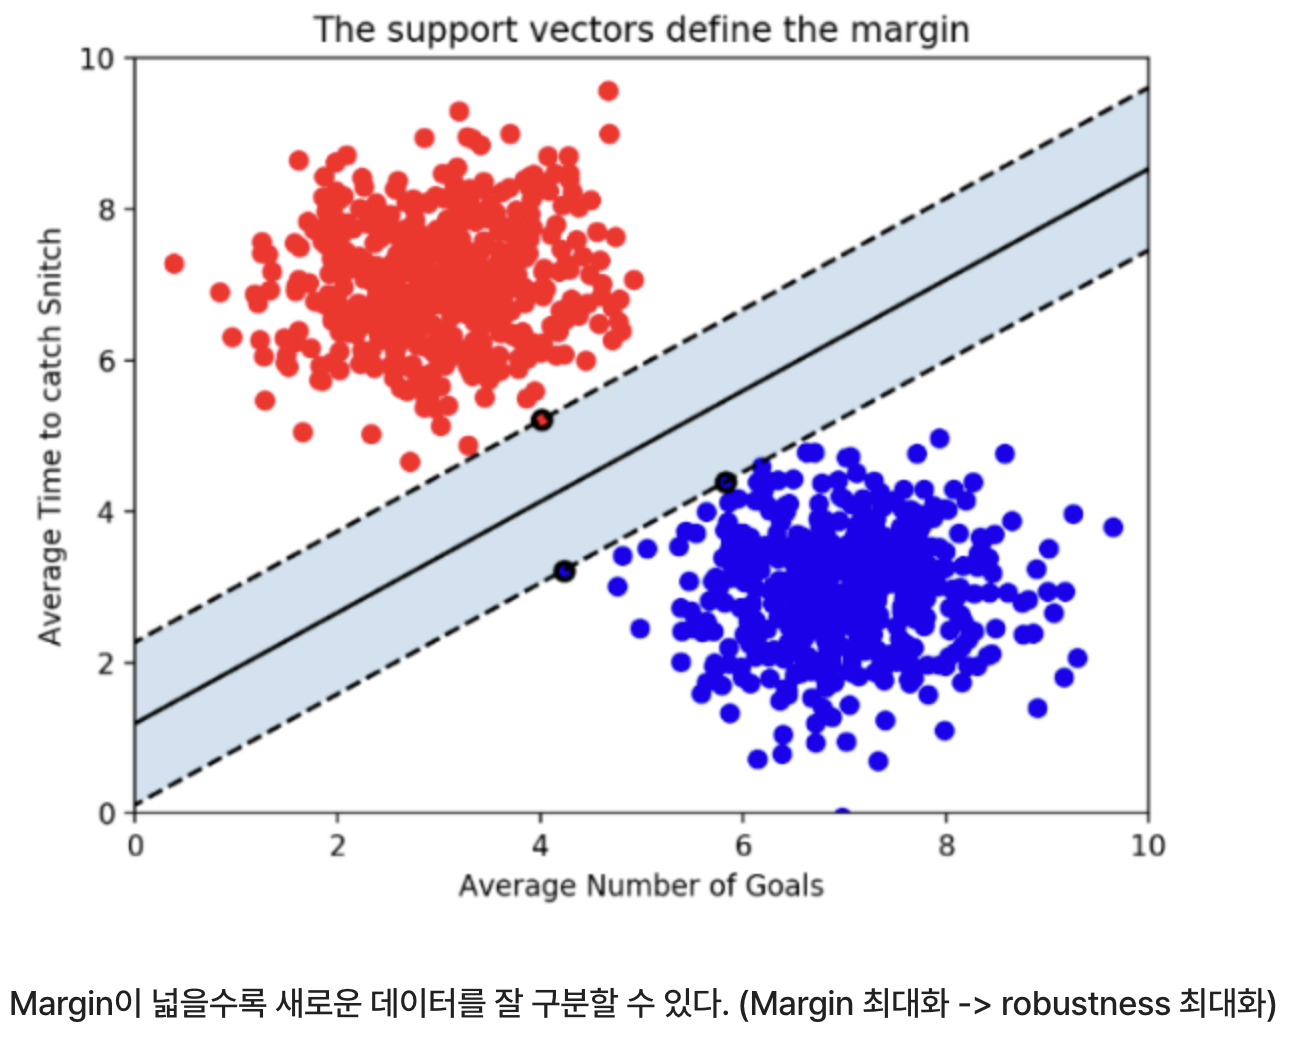

* Kernel Trick: 저차원의 공간을 고차원의 공간으로 매핑해주는 작업. 데이터의 분포가 Linearly separable 하지 않을 경우 데이터를 고차원으로 이동시켜 Linearly separable하도록 만든다.


* cost: Decision Boundary와 Margin의 간격 결정. cost가 높으면 Margin이 좁아지고 train error가 작아진다. 그러나 새로운 데이터에서는 분류를 잘 할 수 있다. cost가 낮으면 Margin이 넓어지고, train error는 커진다.


* γ: 한 train data당 영향을 미치는 범위 결정. γ가 커지면 영향을 미치는 범위가 줄어들고, Decision Boundary에 가까이 있는 데이터만이 선의 굴곡에 영향을 준다. 따라서 Decision Boundary는 구불구불하게 그어진다. (오버피팅 초래 가능) 작아지면 데이터가 영향을 미치는 범위가 커지고, 대부분의 데이터가 Decision Boundary에 영향을 준다. 따라서 Decision Boundary는 직선에 가까워진다.

많은 선형 분류 모델은 대부분 이진 분류 모델입니다. 그런데 이진 분류 알고리즘을 일대다(one-vs.-rest 또는 one-vs.-all) 방법을 사용해 다중 클래스 분류 알고리즘으로 사용할 수 있습니다. 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킵니다. 클래스의 수만큼 이진 분류 모델이 만들어지고 예측할 때는 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택합니다. 그리고 SVM 모델은 다음과 같이 사용합니다.

In [89]:
from sklearn import svm #Support Vector Machine을 사용하기 위해 import
svm_model = svm.SVC() # 모델 객체를 만든다.

print(svm_model._estimator_type) # 이 모델이 어떤 타입인지 확인한다.

classifier


In [90]:
svm_model.fit(X_train, y_train) # 훈련
y_pred = svm_model.predict(X_test) # 예측

svm_report = classification_report(y_test, y_pred)
print(svm_report) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



## Stochastic Gradient Descent Classifier (SGDClassifier)

SGD (Stochastic Gradient Descent)이란?

:배치 크기가 1인 경사하강법 알고리즘 입니다. 

즉, 확률적 경사하강법은 데이터 세트에서 무작위로 균일하게 선택한 하나의 데이터 포인트를 이용하여 각 단계의 예측 경사를 계산합니다.

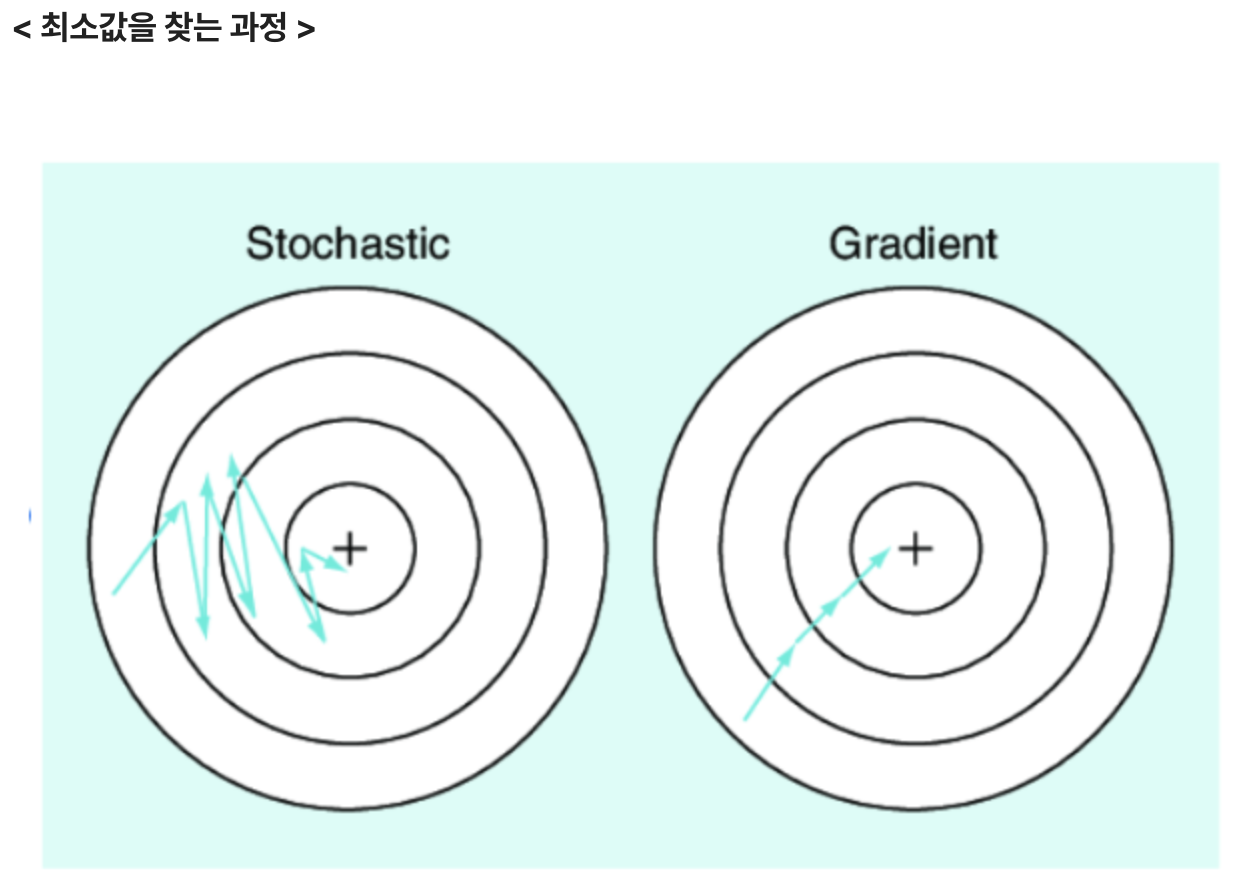

배치란?

:경사하강법에서 배치는 단일 반복에서 기울기를 계산하는 데 사용하는 예(data)의 총 개수입니다. 

Gradient Descent 에서의 배치는 전체 데이터 셋라고 가정합니다.

하지만 대규모의 작업에서는 데이터 셋에 수십억, 수천억 개의 예가 포함되는 경우가 많습니다. 또한 대규모의 데이터 셋에는 엄청나게 많은 특성이 포함되어 있습니다. 따라서 배치가 거대해질 수 있습니다. 배치가 너무 커지면 단일 반복으로도 계산하는 데 오랜 시간이 걸릴 수 있습니다. 따라서 무작위로 샘플링된 예가 포함된 대량의 데이터 셋에는 중복 데이터가 포함되어 있을 수 있습니다. 실제로 배치 크기가 커지면 중복의 가능성도 그만큼 높아집니다.

" 만약에 훨씬 적은 계산으로 적절한 기울기를 얻을 수 있다면 어떨까요? "

데이터 세트에서 예(data)를 무작위로 선택하면 (노이즈는 있겠지만) 훨씬 적은 데이터 세트로 중요한 평균값을 추정할 수 있습니다. 확률적 경사하강법(SGD)은 이 아이디어를 더욱 확장한 것으로서, 반복당 하나의 예(배치 크기 1)만을 사용합니다.

'확률적(Stochastic)'이라는 용어는 각 배치를 포함하는 하나의 예가 무작위로 선택된다는 것을 의미합니다.

<단점> 반복이 충분하면 SGD가 효과는 있지만 노이즈가 매우 심합니다. 확률적 경사하강법의 여러 변형 함수의 최저점에 가까운 점을 찾을 가능성이 높지만 항상 보장되지는 않습니다. (최저점을 찾지 못할 수 있음)

<단점 극복하기> 미니 배치 확률적 경사하강법(미니 배치 SGD)는 전체 배치 반복과 SGD 의 절충안입니다.

미니 배치는 일반적으로 무작위로 선택한 10개에서 1,000개 사이의 예로 구성됩니다. 미니 배치 SGD는 SGD의 노이즈를 줄이면서도 전체 배치보다는 더 효율적입니다.

In [91]:
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import
sgd_model = SGDClassifier() # 모델 객체 생성

print(sgd_model._estimator_type) # 이 모델의 타입을 확인

classifier


In [92]:
sgd_model.fit(X_train, y_train) # sgd모델로 훈련데이터로 훈련시킨다.
y_pred = sgd_model.predict(X_test)# 그 모델로 test데이터를 사용해 예측

sgd_report = classification_report(y_test, y_pred)
print(sgd_report) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.33      0.50        12
           2       0.70      1.00      0.82         7

    accuracy                           0.73        30
   macro avg       0.80      0.78      0.71        30
weighted avg       0.82      0.73      0.69        30



## Logistic Regression

 가장 널리 알려진 선형 분류 알고리즘. 소프트맥스(softmax) 함수를 사용한 다중 클래스 분류 알고리즘이며, 다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고도 합니다. 이름은 회귀지만, 실제로는 분류를 수행합니다.
 
소프트맥스 함수
    : 클래스가 N개일 때, N차원의 벡터가 각 클래스가 정답일 확률을 표현하도록 정규화를 해주는 함수. 
    
    아래의 그림은 4차원의 벡터를 입력으로 받아 3개의 클래스를 예측하는 경우의 소프트맥스 회귀의 동작 과정을 보여준다. 3개의 클래스 중 1개의 클래스를 예측해야 하므로 소프트맥스 회귀의 출력은 3차원의 벡터고, 각 벡터의 차원은 특정 클래스일 확률이다. 오차와 실제값의 차이를 줄이는 과정에서 가중치와 편향이 학습됩니다.


 
 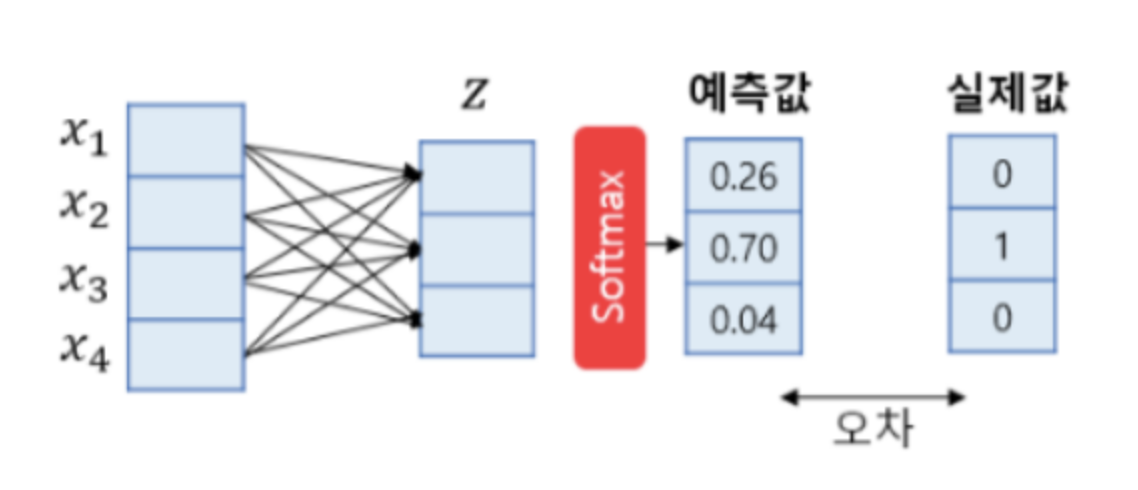
 
 

In [93]:
from sklearn.linear_model import LogisticRegression # 선형분류기인 LogisticRegression를 사용하기 위한 import
logistic_model = LogisticRegression() # 모델 객체 생성

print(logistic_model._estimator_type) # 이 모델의 타입을 확인

classifier


In [94]:
logistic_model.fit(X_train, y_train) #LogisticRegression모델로 훈련데이터를 가지고 훈련시킨다.
y_pred = logistic_model.predict(X_test) # 예측

logistic_report = classification_report(y_test, y_pred)
print(logistic_report) # 결과 지표를 확인

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [95]:
#### 다양한 모델들의 예측값의 결가지표 비교하기
print('< Decision Tree >')
print(decision_report)

print('< Random Forest >')
print(random_report)

print('< SVM >')
print(svm_report)

print('< SGD >')
print(sgd_report)

print('< Logistic Regression >')
print(logistic_report)

< Decision Tree >
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

< Random Forest >
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30

< SVM >
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.

### 분석:
SGD 모델의 F1-score를 고려하였을때 3개의 군집 모두 가장 높은 점수를 보여주기 때문에 SGD모델이 이 분류 미션에 가장 적합한 모델이라고 할 수 있다.